<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_01_ProjOne_Supvised_Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import (metrics, linear_model)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
path = "./"

In [ ]:
attr = {
    'cap-shape':                ['bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s'],
    'cap-surface':              ['fibrous=f,grooves=g,scaly=y,smooth=s'],
    'cap-color':                ['brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y'],
    'bruises':                  ['bruises=t,no=f'],
    'odor':                     ['almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s'],
    'gill-attachment':          ['attached=a,descending=d,free=f,notched=n'],
    'gill-spacing':             ['close=c,crowded=w,distant=d'],
    'gill-size':                ['broad=b,narrow=n'],
    'gill-color':               ['black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y'],
    'stalk-shape':              ['enlarging=e,tapering=t'],
    'stalk-root':               ['bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?'],
    'stalk-surface-above-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-surface-below-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-color-above-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'stalk-color-below-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'veil-type':                ['partial=p,universal=u'],
    'veil-color':               ['brown=n,orange=o,white=w,yellow=y'],
    'ring-number':              ['none=n,one=o,two=t'],
    'ring-type':                ['cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z'],
    'spore-print-color':        ['black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y'],
    'population':               ['abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y'],
    'habitat':                  ['grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'],
}

print("Number of feaures:", len(attr))
for key, val in attr.items():
    attr[key] = val[0].split(",")

Number of feaures: 22


In [ ]:
df_main = pd.read_csv(path + 'agaricus-lepiota.data', header=None)
print(df_main.shape)
df_main.head()

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df_main.columns = ['class'] + list(attr.keys())
df_main.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df_main.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
X_main = df_main.drop('class', axis=1, inplace=False)
y = df_main['class']

X_main.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df_main['class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [ ]:
df_main.groupby(['class'])['class'].describe()

,count,unique,top,freq
class,,,,
e,4208,1,e,4208
p,3916,1,p,3916


In [ ]:
X_main = pd.get_dummies(X_main, drop_first=True)
X_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 8124 non-null   uint8
 1   cap-shape_f                 8124 non-null   uint8
 2   cap-shape_k                 8124 non-null   uint8
 3   cap-shape_s                 8124 non-null   uint8
 4   cap-shape_x                 8124 non-null   uint8
 5   cap-surface_g               8124 non-null   uint8
 6   cap-surface_s               8124 non-null   uint8
 7   cap-surface_y               8124 non-null   uint8
 8   cap-color_c                 8124 non-null   uint8
 9   cap-color_e                 8124 non-null   uint8
 10  cap-color_g                 8124 non-null   uint8
 11  cap-color_n                 8124 non-null   uint8
 12  cap-color_p                 8124 non-null   uint8
 13  cap-color_r                 8124 non-null   uint8
 14  cap-colo

All feature labels may not be visible on the plot


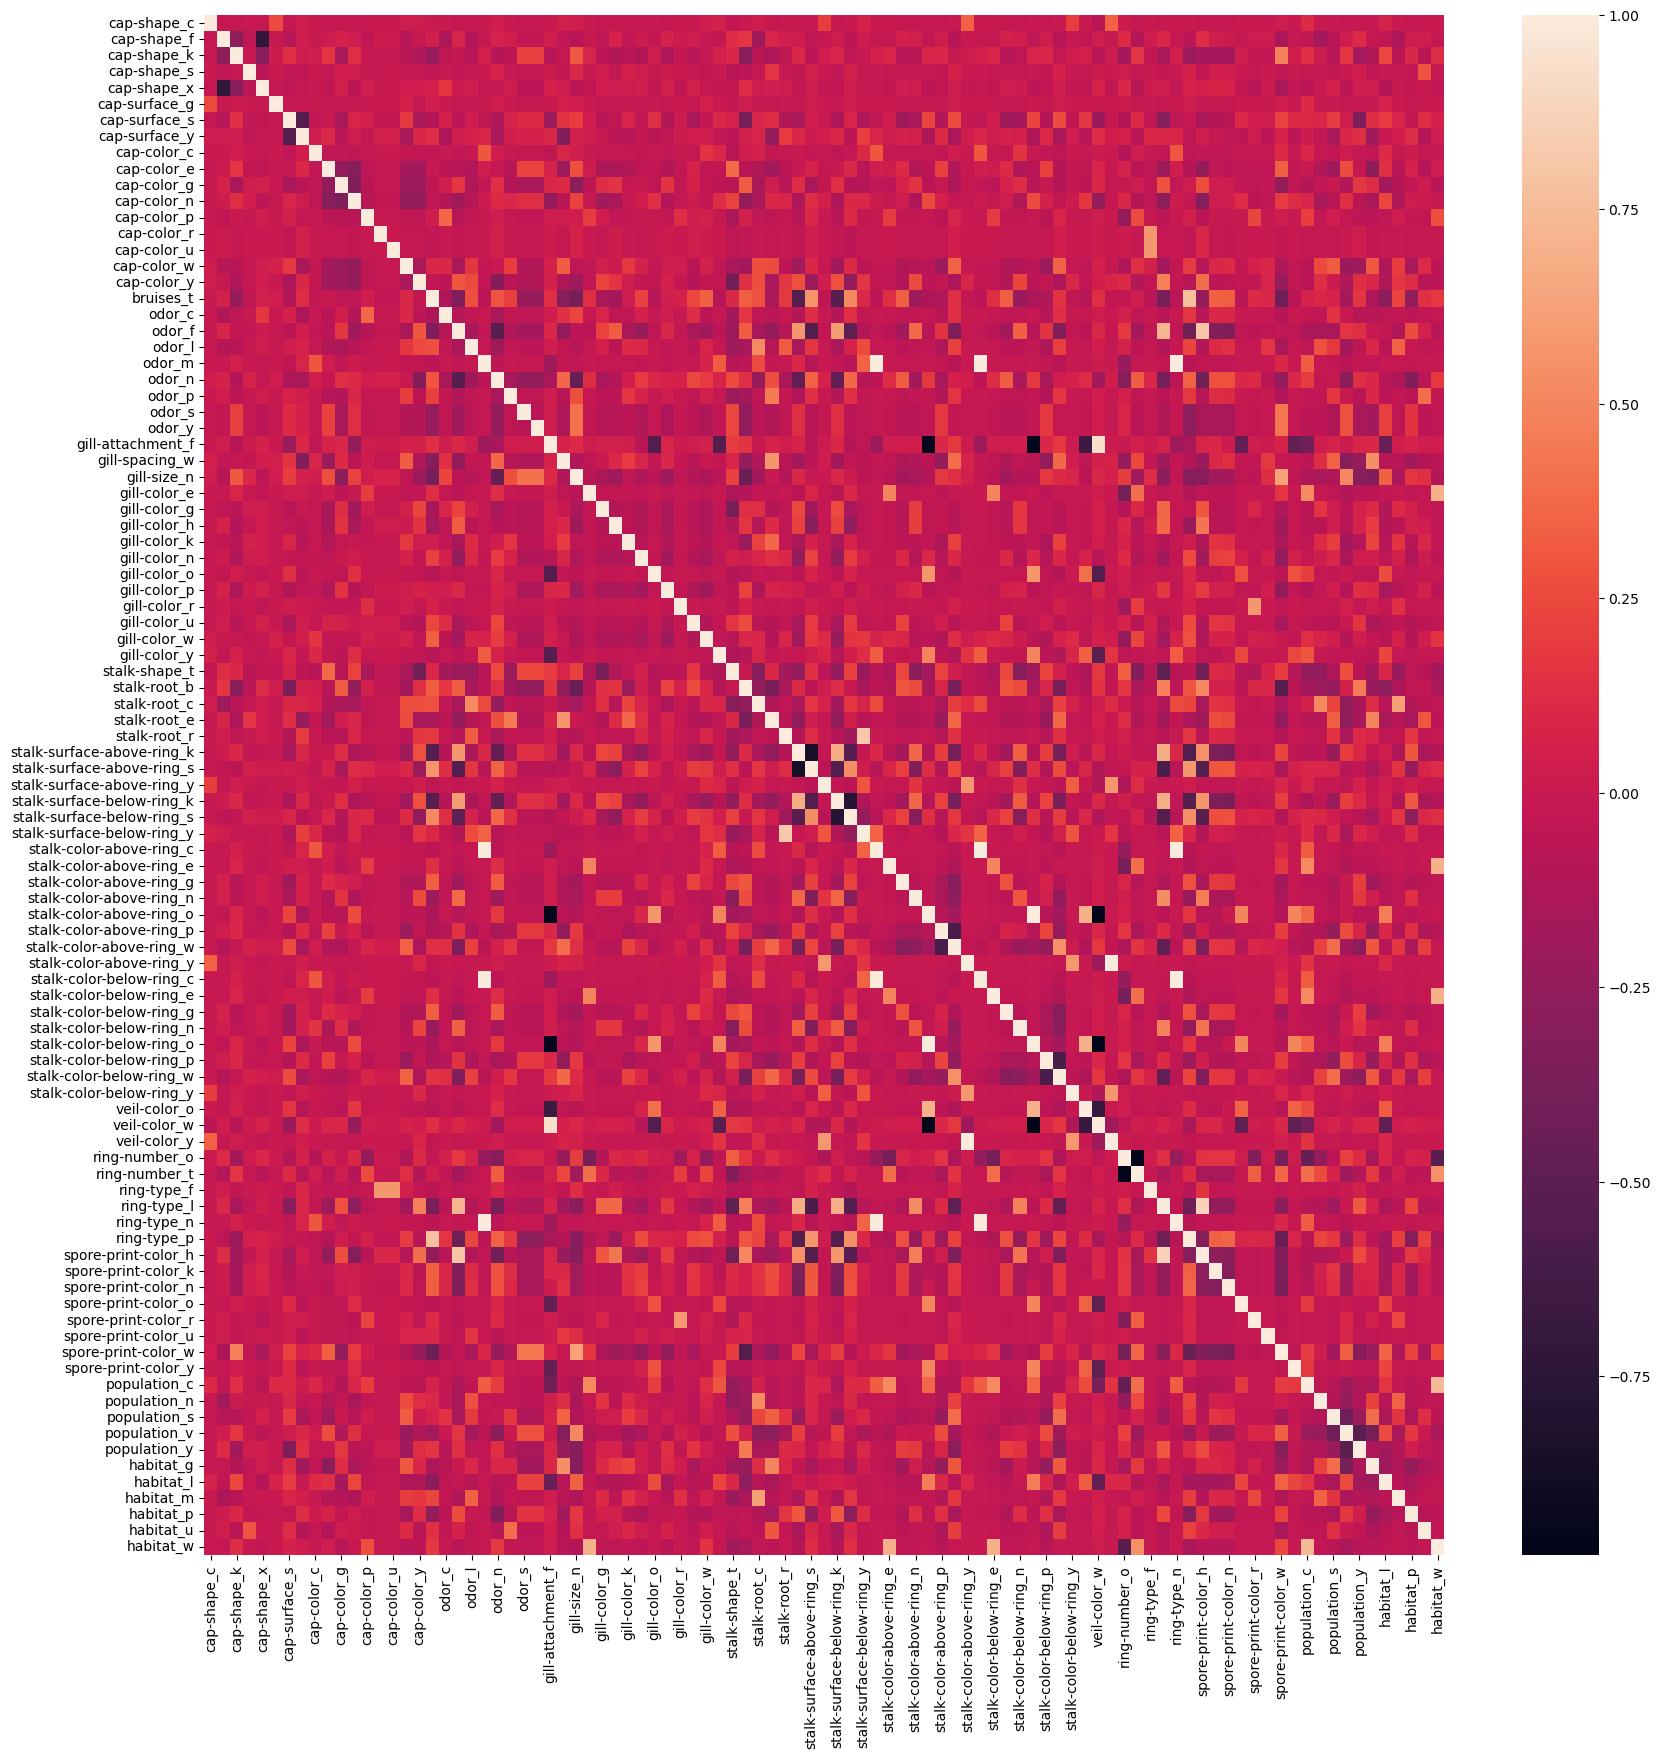

In [ ]:
print("All feature labels may not be visible on the plot")
corr = X_main.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr.round(2))
plt.show()

In [ ]:
def remove_colinear_cols(X):
    cols = list(X.columns)
    print("Numer of features (before):", len(cols))

    for col in cols:
        for icol in cols:
            if(col!=icol):
                rsq = np.corrcoef(X[col], X[icol])[0,1]**2
                if((rsq >=0.7) | (rsq <= -0.7)):
                    cols.remove(icol)
    print('Number of features (after):', len(cols))
    return cols

# Update keep only non-colinear features
new_cols = remove_colinear_cols(X_main)

Numer of features (before): 95
Number of features (after): 85


In [ ]:
X = X_main[new_cols]

variances = X.var()
variance_threshold = 0.01
low_variance_columns = variances[variances <= variance_threshold].index

X.drop(columns=low_variance_columns, inplace=True)
len(X.columns)

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_68320/3604000954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=low_variance_columns, inplace=True)


68

All feature labels may not be visible on the plot


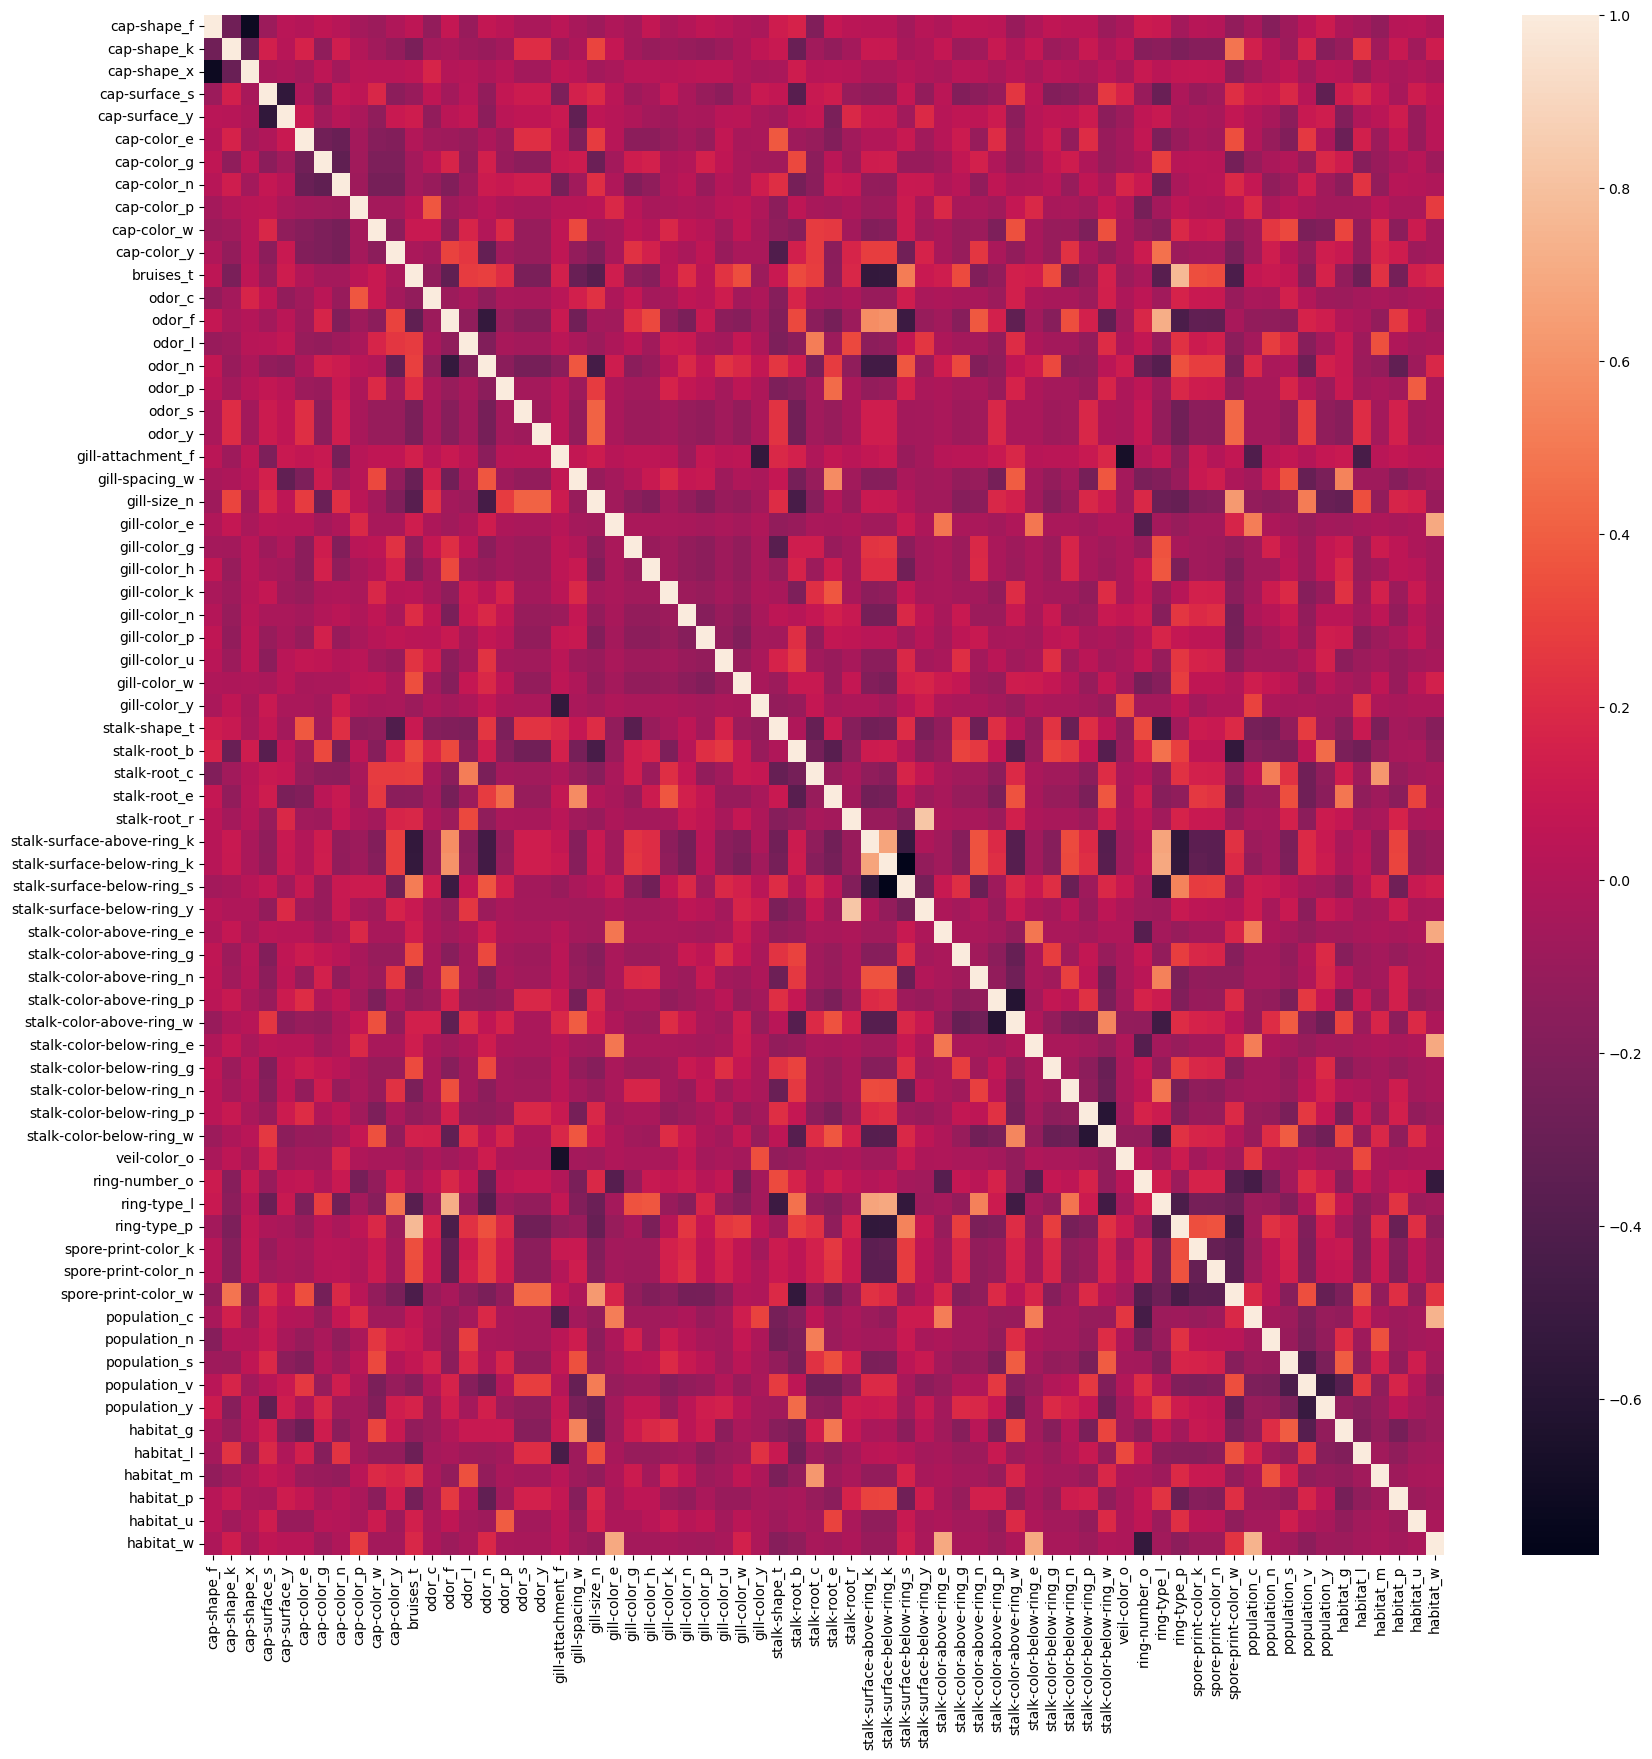

In [ ]:
print("All feature labels may not be visible on the plot")
corr = X.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr.round(2))
plt.show()

In [ ]:
X = X.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6093, 68) (2031, 68) (6093,) (2031,)


In [ ]:
def fit_predict(clf):
    print(clf)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acu = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ", acu)
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)
    return acu, cm

results = []

for clf, name in (
                (linear_model.LogisticRegression(penalty='l2', tol=1e-2, solver='liblinear'), 'Logistic Regression Classifier'),
                (linear_model.RidgeClassifier(alpha=0.5, tol=1e-2, solver='auto'), 'Ridge Classifier'),
                (linear_model.Perceptron(penalty='elasticnet', max_iter=50), 'Perceptron'),
                (linear_model.PassiveAggressiveClassifier(tol=1e-2, max_iter=50), 'Passive Aggresive Classifier'),
                (LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5), 'LDA'),
                (QuadraticDiscriminantAnalysis(reg_param=0.5), 'QDA')
                ):
    print(name, end=":\n")
    results.append((fit_predict(clf), name))
    print("-"*50)
print("\n")
for penalty in ['l2', 'l1', 'elasticnet']:
    print('SGD Classifier: %s penalty' % penalty.upper())
    print("-"*50)

    results.append((fit_predict(linear_model.SGDClassifier(alpha=1e-2, max_iter=50, penalty=penalty)), 'SGD Classifier'))

Logistic Regression Classifier:
LogisticRegression(solver='liblinear', tol=0.01)
Accuracy:  0.999507631708518
Confusion matrix:
 [[1013    0]
 [   1 1017]]
--------------------------------------------------
Ridge Classifier:
RidgeClassifier(alpha=0.5, tol=0.01)
Accuracy:  0.999507631708518
Confusion matrix:
 [[1013    0]
 [   1 1017]]
--------------------------------------------------
Perceptron:
Perceptron(max_iter=50, penalty='elasticnet')
Accuracy:  0.9926144756277696
Confusion matrix:
 [[1013    0]
 [  15 1003]]
--------------------------------------------------
Passive Aggresive Classifier:
PassiveAggressiveClassifier(max_iter=50, tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1013    0]
 [   0 1018]]
--------------------------------------------------
LDA:
LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr')
Accuracy:  0.9876907927129492
Confusion matrix:
 [[1008    5]
 [  20  998]]
--------------------------------------------------
QDA:
QuadraticDiscriminantAnalysis(reg_param=

/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
